# CPSC 330 - Applied Machine Learning 

## Homework 6: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Wednesday, March 15, 2023 at 11:59pm**

## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [1]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

<br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). 

**You may work on this homework in a group and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 3. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a customer will cancel the reservation they have made at a hotel. 
For this problem, you will use [Reservation Cancellation Prediction Dataset](https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction?select=train__dataset.csv). In this data set, there are about 18.000 examples and 18 features (including the target), and the goal is to estimate whether a person will cancel their booking; this column is labeled "booking_status" in the data (1 = canceled). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction?select=train__dataset.csv). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

### BEGIN SOLUTION

This is a binary classification problem. The task is to predict whether a customer will cancel their hotel booking or not. The dataset is of moderate size. The number of features is rather small. I would consider this as a small dimensional problem. All features are numerically encoded. That said, some features such as meal type or room type seem more like categorical features. 

In [2]:
df = pd.read_csv("train__dataset.csv")

In [3]:
df.shape

(18137, 18)

### END SOLUTION

<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

### BEGIN SOLUTION

In [4]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df.shape

(12695, 18)

### END SOLUTION

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

### BEGIN SOLUTION

In [5]:
print("n=%d, d=%d" % train_df.shape)
train_df.describe()

n=12695, d=18


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.0000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000
mean,1.851359,0.106892,0.809137,2.202915,0.317290,0.032690,0.338007,85.579913,2017.820402,7.431587,15.743127,0.8000,0.025207,0.022371,0.158724,103.519186,0.625286,0.326113
std,0.515134,0.398709,0.870111,1.419864,0.630232,0.177831,0.775014,87.294409,0.383868,3.084243,8.765916,0.6444,0.156759,0.355431,1.788642,35.370949,0.790905,0.468808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.000000,2018.000000,5.000000,8.000000,0.0000,0.000000,0.000000,0.000000,80.100000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.0000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,1.0000,0.000000,0.000000,0.000000,120.600000,1.000000,1.000000
max,4.000000,3.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.0000,1.000000,13.000000,58.000000,375.500000,5.000000,1.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12695 entries, 15946 to 15725
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          12695 non-null  int64  
 1   no_of_children                        12695 non-null  int64  
 2   no_of_weekend_nights                  12695 non-null  int64  
 3   no_of_week_nights                     12695 non-null  int64  
 4   type_of_meal_plan                     12695 non-null  int64  
 5   required_car_parking_space            12695 non-null  int64  
 6   room_type_reserved                    12695 non-null  int64  
 7   lead_time                             12695 non-null  int64  
 8   arrival_year                          12695 non-null  int64  
 9   arrival_month                         12695 non-null  int64  
 10  arrival_date                          12695 non-null  int64  
 11  market_segm

Seems like there are no missing values and all the columns are encoded as numeric columns. 

In [7]:
print(
    "Fraction that cancel:\n",
    train_df["booking_status"].value_counts(normalize=True),
)

Fraction that cancel:
 0    0.673887
1    0.326113
Name: booking_status, dtype: float64


We have a class imbalance. Both classes seem important here and I am going to pick macro-average f1 score as our evaluation metric. 

In [8]:
from sklearn.metrics import f1_score, make_scorer, recall_score

custom_scorer = make_scorer(f1_score, average="macro")
scoring_metric = custom_scorer

In [9]:
np.max(train_df, axis=0)

no_of_adults                               4.0
no_of_children                             3.0
no_of_weekend_nights                       7.0
no_of_week_nights                         17.0
type_of_meal_plan                          3.0
required_car_parking_space                 1.0
room_type_reserved                         6.0
lead_time                                443.0
arrival_year                            2018.0
arrival_month                             12.0
arrival_date                              31.0
market_segment_type                        4.0
repeated_guest                             1.0
no_of_previous_cancellations              13.0
no_of_previous_bookings_not_canceled      58.0
avg_price_per_room                       375.5
no_of_special_requests                     5.0
booking_status                             1.0
dtype: float64

In [10]:
np.min(train_df, axis=0)

no_of_adults                               0.0
no_of_children                             0.0
no_of_weekend_nights                       0.0
no_of_week_nights                          0.0
type_of_meal_plan                          0.0
required_car_parking_space                 0.0
room_type_reserved                         0.0
lead_time                                  0.0
arrival_year                            2017.0
arrival_month                              1.0
arrival_date                               1.0
market_segment_type                        0.0
repeated_guest                             0.0
no_of_previous_cancellations               0.0
no_of_previous_bookings_not_canceled       0.0
avg_price_per_room                         0.0
no_of_special_requests                     0.0
booking_status                             0.0
dtype: float64

In [11]:
X_train, y_train = (
    train_df.drop(columns=["booking_status"]),
    train_df["booking_status"],
)
X_test, y_test = (
    test_df.drop(columns=["booking_status"]),
    test_df["booking_status"],
)

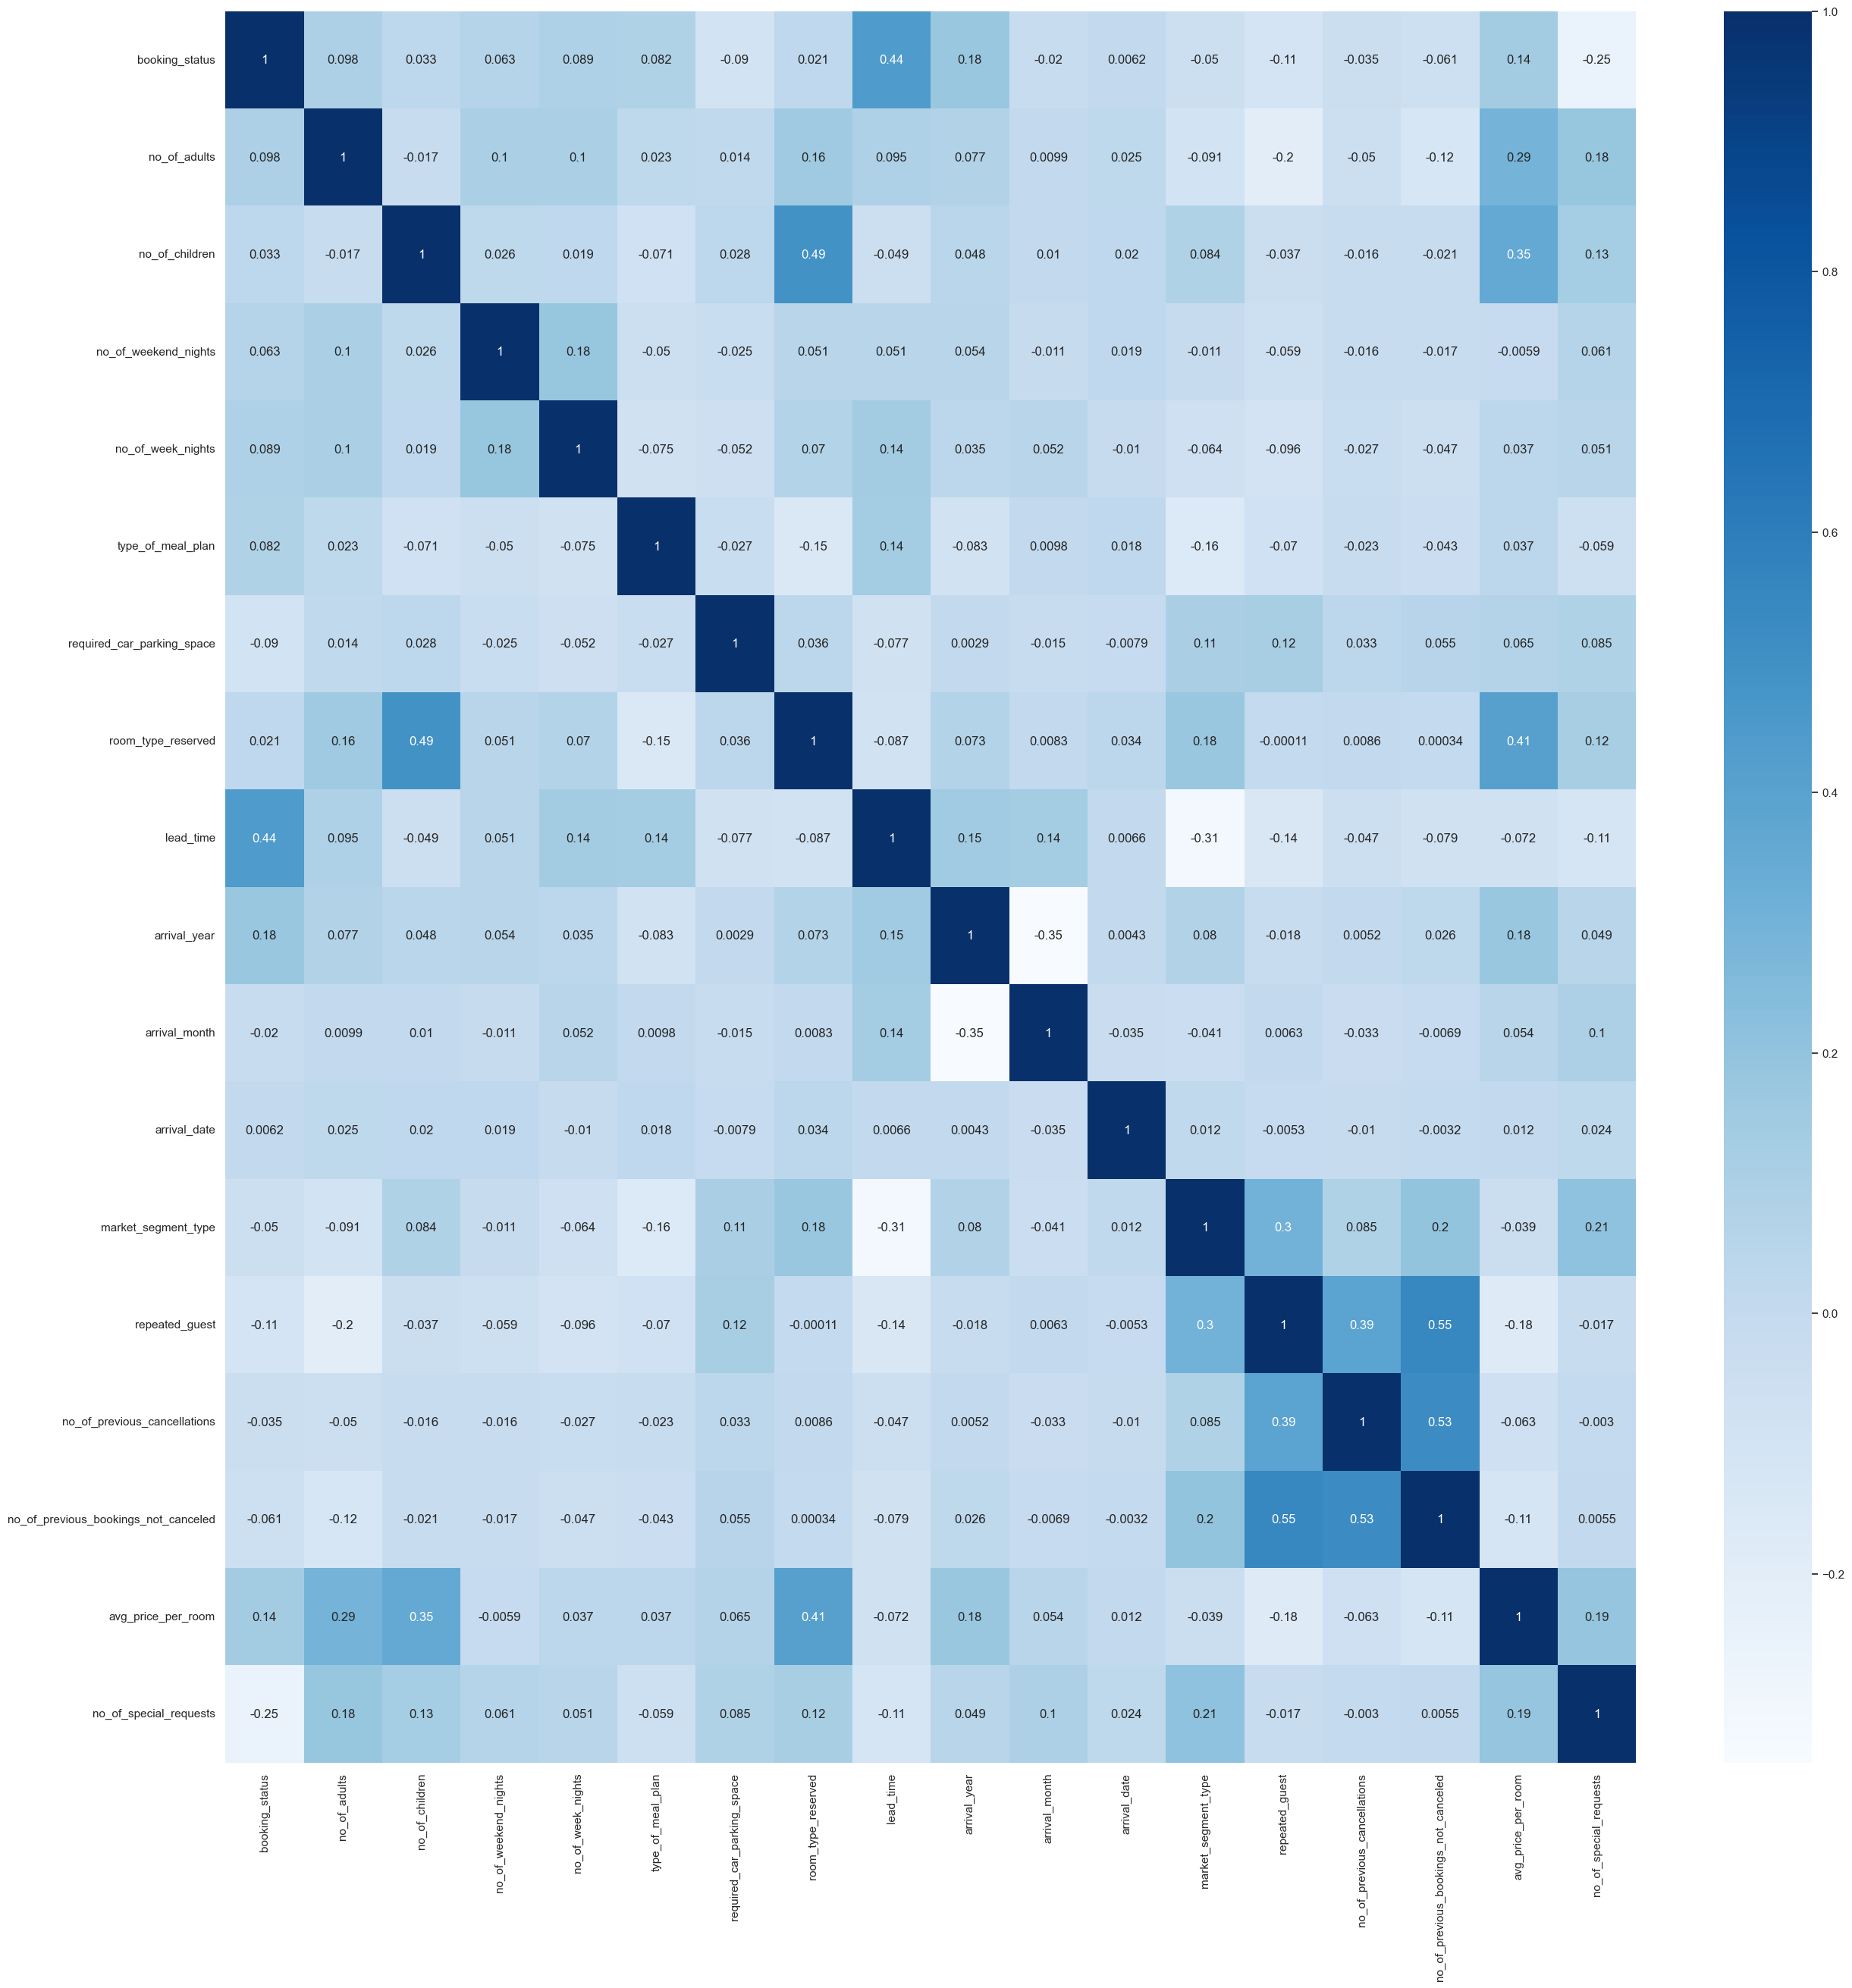

In [12]:
cor = pd.concat((y_train, X_train), axis=1).iloc[:, :30].corr()
plt.figure(figsize=(30, 30))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

Seems like booking status is highly correlated with lead time. 

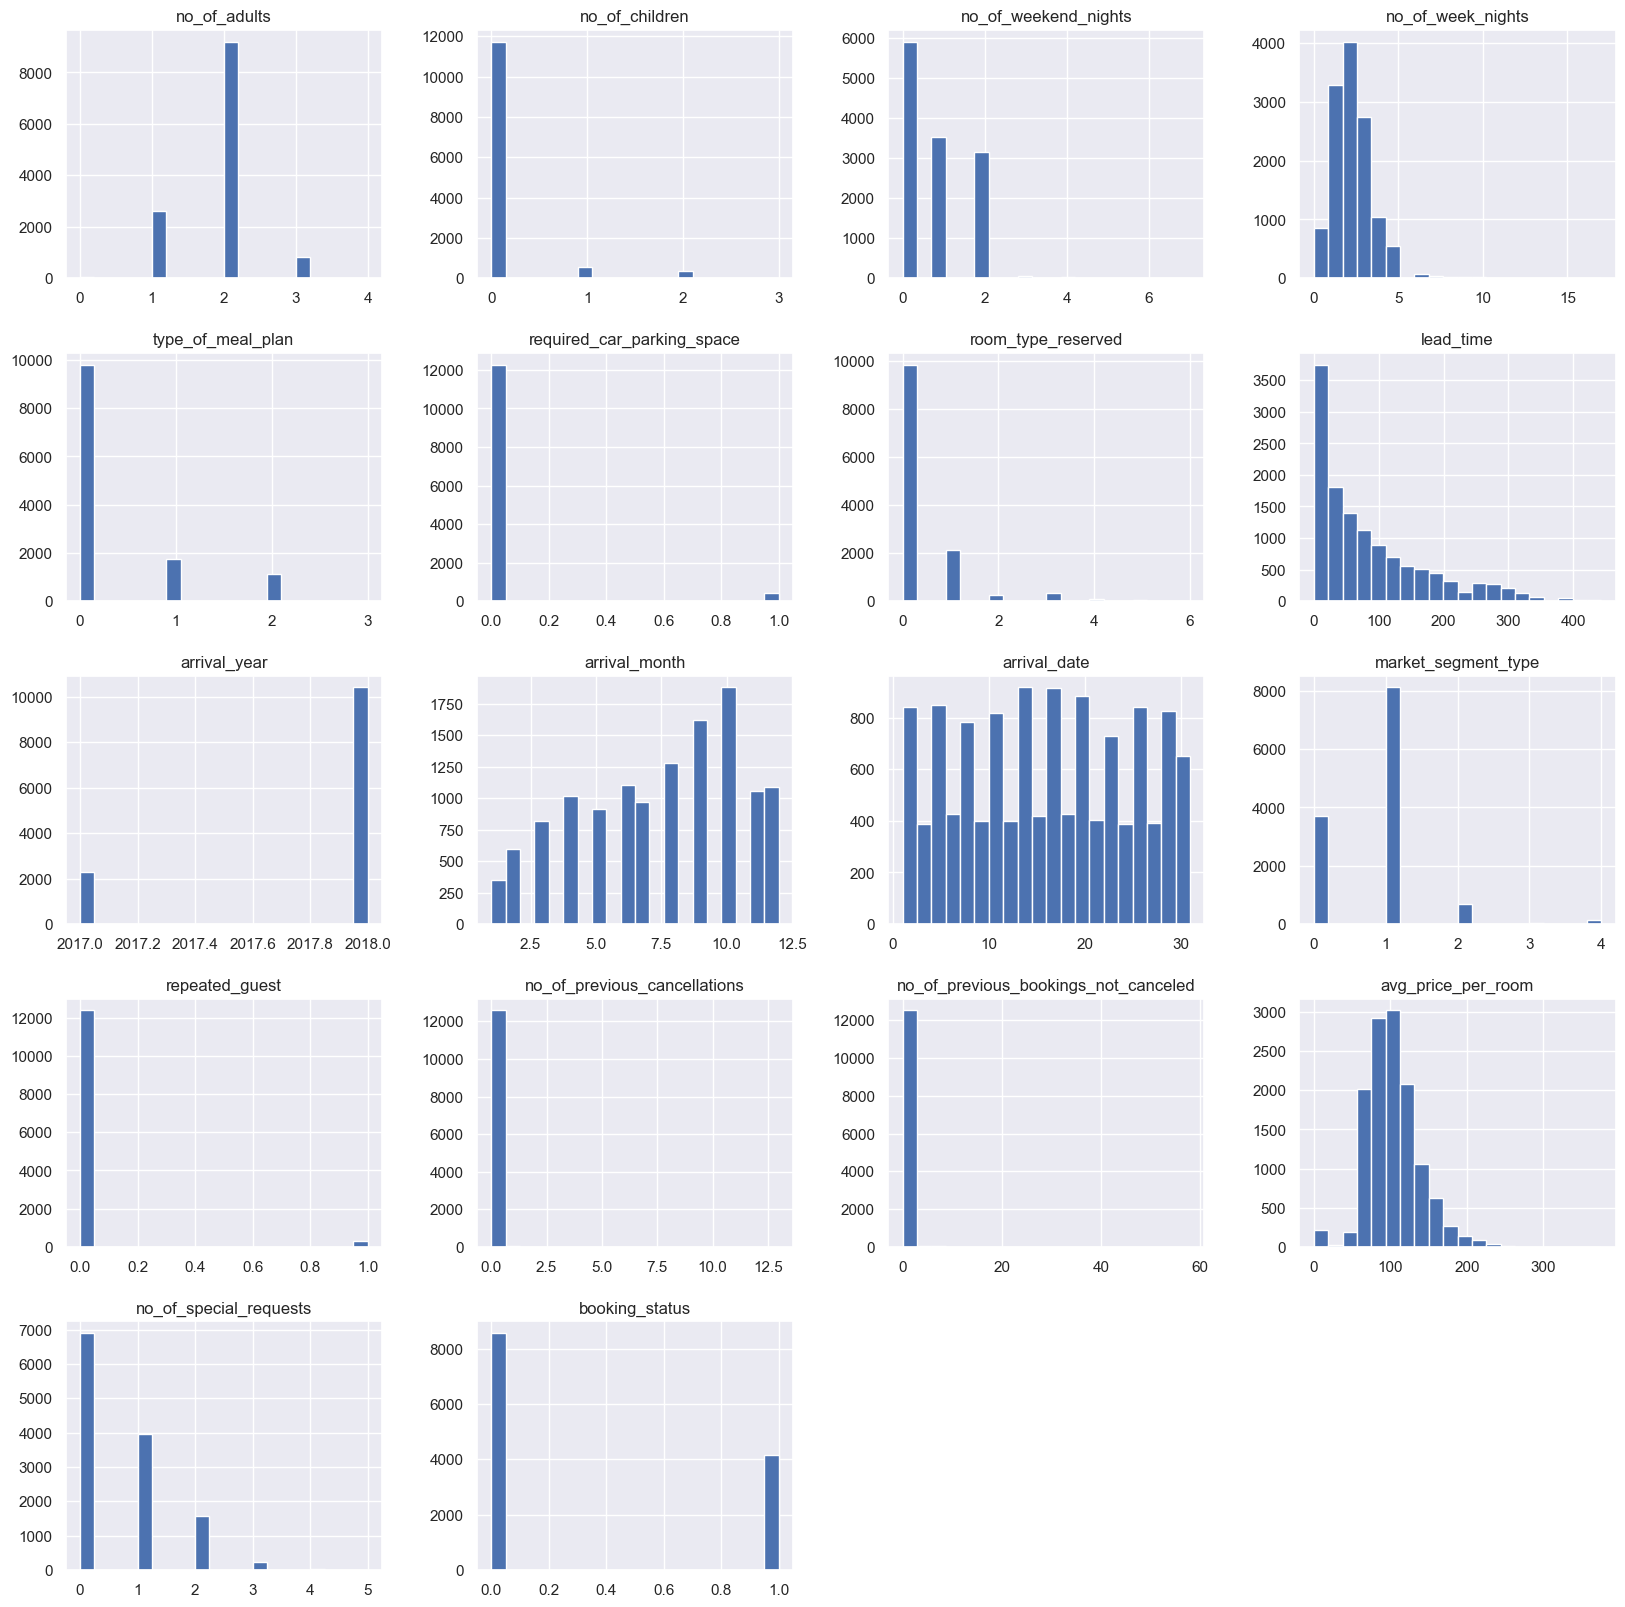

In [13]:
train_df.hist(figsize=(20, 20), bins=20);

We see quite a few outliers for features such as `no_of_previous_cancellations`, `no_of_previous_bookings_not_canceled`, and `repeated_guest` features. 

Some initial observations:
    
- We have very few features.
- We have class imbalance and we need to deal with it. We have chosen macro average f1 as our metric where both classes get equal weight. 
- The feature ranges are very different, so we'll need to standardize. 
- Most features are discrete with few falues.
- We have few collinear features.
- We have quite a few outliers. 
- We don't know the meaning behind some features, such as `market_segment_type` and `meal_type`

### END SOLUTION

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

### BEGIN SOLUTION
# TODO 
### END SOLUTION

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

### BEGIN SOLUTION

In [14]:
# Let's identify numeric and categorical features
numeric_features = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "required_car_parking_space",
    "lead_time",
    "arrival_month",
    "arrival_date",
    "repeated_guest",
    "no_of_previous_cancellations",
    "no_of_previous_bookings_not_canceled",
    "avg_price_per_room",
    "no_of_special_requests",
]
# some of the numerical features are actually binary, but we can leave them as is since they are already
# coded as 0/1
categorical_features = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]
drop_features = ["arrival_year"]   # only has 2 values, it is not a promising feature
target = "booking_status"

In [15]:
preprocessor = make_column_transformer(
    ("drop", drop_features),
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
)

In [16]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    """
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [17]:
results = {}

### END SOLUTION

<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

### BEGIN SOLUTION

In [18]:
dummy = DummyClassifier(strategy="stratified")
results["dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results)

,dummy
fit_time,0.001 (+/- 0.001)
score_time,0.001 (+/- 0.001)
test_score,0.493 (+/- 0.011)
train_score,0.501 (+/- 0.005)


### END SOLUTION

<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

### BEGIN SOLUTION

In [19]:
pipe_lr = make_pipeline(
    preprocessor, LogisticRegression(max_iter=1000, class_weight="balanced")
)
results["logreg"] = mean_std_cross_val_scores(
    pipe_lr, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results)

,dummy,logreg
fit_time,0.001 (+/- 0.001),0.122 (+/- 0.007)
score_time,0.001 (+/- 0.001),0.004 (+/- 0.001)
test_score,0.493 (+/- 0.011),0.761 (+/- 0.007)
train_score,0.501 (+/- 0.005),0.763 (+/- 0.002)


In [20]:
from scipy.stats import lognorm, loguniform, randint

param_grid = {"logisticregression__C": loguniform(1e-3, 1e3)}

random_search = RandomizedSearchCV(
    pipe_lr,
    param_grid,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [21]:
print("Best hyperparameter values: ", random_search.best_params_)
print("Best score: %0.3f" % (random_search.best_score_))

pd.DataFrame(random_search.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_logisticregression__C",
        "mean_fit_time",
        "rank_test_score",
        "std_test_score",
    ]
].set_index("rank_test_score").sort_index()[:10]

Best hyperparameter values:  {'logisticregression__C': 0.002280695888578118}
Best score: 0.765


,mean_train_score,mean_test_score,param_logisticregression__C,mean_fit_time,std_test_score
rank_test_score,,,,,
1,0.764876,0.764752,0.002281,0.022277,0.008877
2,0.764620,0.764506,0.00494,0.024261,0.007511
3,0.765086,0.763886,0.00357,0.021982,0.008039
4,0.763394,0.761820,819.141094,0.139911,0.006248
4,0.763394,0.761820,462.338553,0.175353,0.006248
4,0.763394,0.761820,229.263532,0.195129,0.006248
4,0.763418,0.761820,766.628906,0.179883,0.006248
8,0.763437,0.761819,15.094374,0.191242,0.006155
8,0.763362,0.761819,5.542653,0.169677,0.006155


In [22]:
best_logreg = random_search.best_estimator_
results["logreg (tuned)"] = mean_std_cross_val_scores(
    best_logreg, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.001),0.001 (+/- 0.001),0.493 (+/- 0.011),0.501 (+/- 0.005)
logreg,0.122 (+/- 0.007),0.004 (+/- 0.001),0.761 (+/- 0.007),0.763 (+/- 0.002)
logreg (tuned),0.046 (+/- 0.037),0.004 (+/- 0.001),0.765 (+/- 0.010),0.765 (+/- 0.002)


- Logistic regression scores are better than the dummy classifier scores. 
- Optimizing the regularization hyperparameter of logistic regression improved the validation scores slightly (from 0.761 to 0.765) but not by much. 
- In both cases it seems like we are underfitting; there is not much gap between train and validation scores. Probably non-linear models might be a better choice here. 

### END SOLUTION

<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

### BEGIN SOLUTION

In [23]:
ratio = np.bincount(y_train)[0] / np.bincount(y_train)[1]
ratio

2.066425120772947

In [24]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "RBF SVM": SVC(),
    "random forest": RandomForestClassifier(class_weight="balanced", random_state=2),
    "xgboost": XGBClassifier(scale_pos_weight=ratio, random_state=2),
    "lgbm": LGBMClassifier(scale_pos_weight=ratio, random_state=2),
}

for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    results[name] = mean_std_cross_val_scores(
        pipe, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.001),0.001 (+/- 0.001),0.493 (+/- 0.011),0.501 (+/- 0.005)
logreg,0.122 (+/- 0.007),0.004 (+/- 0.001),0.761 (+/- 0.007),0.763 (+/- 0.002)
logreg (tuned),0.046 (+/- 0.037),0.004 (+/- 0.001),0.765 (+/- 0.010),0.765 (+/- 0.002)
RBF SVM,2.211 (+/- 0.043),0.869 (+/- 0.026),0.801 (+/- 0.009),0.817 (+/- 0.004)
random forest,0.689 (+/- 0.017),0.039 (+/- 0.001),0.860 (+/- 0.003),0.996 (+/- 0.000)
xgboost,0.480 (+/- 0.072),0.009 (+/- 0.004),0.857 (+/- 0.008),0.941 (+/- 0.005)
lgbm,0.189 (+/- 0.055),0.010 (+/- 0.001),0.852 (+/- 0.006),0.897 (+/- 0.002)


- I am using four non-linear models here: RBF SVM and three tree-based models. 
- We are trying all models with default hyperparameters. 
- Similar to logistic regression, SVC also seems to underfit; the gap between train and test scores are not large. Also, as expected, it takes longer to `fit` compared to other models. Let's abandon it. 
- The tree based models have similar performance, but LGBM seems to be much faster and overfitting less compared to random forest and xgboost, so it is not a bad choice. 

In [25]:
del models["RBF SVM"]

### END SOLUTION

<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

### BEGIN SOLUTION

TBD

### END SOLUTION

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

### BEGIN SOLUTION

#### Random forest hyperparameter optimization 

In [26]:
param_grid_rf = {
    "randomforestclassifier__n_estimators": randint(low=10, high=100),
    "randomforestclassifier__max_depth": randint(low=2, high=20),
}

pipe_random_forest = make_pipeline(preprocessor, models["random forest"])

In [27]:
random_search_rf = RandomizedSearchCV(
    pipe_random_forest,
    param_grid_rf,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search_rf.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [28]:
print("Best hyperparameter values: ", random_search_rf.best_params_)
print("Best score: %0.3f" % (random_search_rf.best_score_))

pd.DataFrame(random_search_rf.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_randomforestclassifier__n_estimators",
        "param_randomforestclassifier__max_depth",
        "mean_fit_time",
        "rank_test_score",
        "std_test_score",
    ]
].set_index("rank_test_score").sort_index()[:10]

Best hyperparameter values:  {'randomforestclassifier__max_depth': 19, 'randomforestclassifier__n_estimators': 96}
Best score: 0.866


,mean_train_score,mean_test_score,param_randomforestclassifier__n_estimators,param_randomforestclassifier__max_depth,mean_fit_time,std_test_score
rank_test_score,,,,,,
1,0.973909,0.866108,96,19,0.619266,0.004700
2,0.954623,0.864022,71,17,0.445873,0.004197
3,0.942024,0.863474,93,16,0.570772,0.004307
4,0.941862,0.863050,84,16,0.506339,0.003667
5,0.941729,0.862931,85,16,0.550504,0.003633
6,0.941597,0.860155,25,16,0.157775,0.005638
7,0.940766,0.860130,46,16,0.279057,0.002588
8,0.940803,0.860109,35,16,0.217043,0.003898
9,0.971913,0.860009,22,19,0.148660,0.006999


In [29]:
best_rf_model = random_search_rf.best_estimator_
results["random forest (tuned)"] = mean_std_cross_val_scores(
    best_rf_model, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.001),0.001 (+/- 0.001),0.493 (+/- 0.011),0.501 (+/- 0.005)
logreg,0.122 (+/- 0.007),0.004 (+/- 0.001),0.761 (+/- 0.007),0.763 (+/- 0.002)
logreg (tuned),0.046 (+/- 0.037),0.004 (+/- 0.001),0.765 (+/- 0.010),0.765 (+/- 0.002)
RBF SVM,2.211 (+/- 0.043),0.869 (+/- 0.026),0.801 (+/- 0.009),0.817 (+/- 0.004)
random forest,0.689 (+/- 0.017),0.039 (+/- 0.001),0.860 (+/- 0.003),0.996 (+/- 0.000)
xgboost,0.480 (+/- 0.072),0.009 (+/- 0.004),0.857 (+/- 0.008),0.941 (+/- 0.005)
lgbm,0.189 (+/- 0.055),0.010 (+/- 0.001),0.852 (+/- 0.006),0.897 (+/- 0.002)
random forest (tuned),0.634 (+/- 0.018),0.036 (+/- 0.000),0.866 (+/- 0.005),0.974 (+/- 0.003)


#### LGBM hyperparameter optimization 

In [30]:
param_grid_lgbm = {
    "lgbmclassifier__n_estimators": randint(10, 100),
    # "lgbmclassifier__max_depth": randint(low=2, high=20),
    "lgbmclassifier__learning_rate": [0.01, 0.1],
    "lgbmclassifier__subsample": [0.5, 0.75, 1],
}

pipe_lgbm = make_pipeline(
    preprocessor,
    models["lgbm"],
)

In [31]:
random_search_lgbm = RandomizedSearchCV(
    pipe_lgbm,
    param_grid_lgbm,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=100,
    return_train_score=True,
)

random_search_lgbm.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [32]:
print("Best hyperparameter values: ", random_search_lgbm.best_params_)
print("Best score: %0.3f" % (random_search_lgbm.best_score_))

pd.DataFrame(random_search_lgbm.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_lgbmclassifier__n_estimators",
        "param_lgbmclassifier__learning_rate",
        "param_lgbmclassifier__subsample",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index()[:10]

Best hyperparameter values:  {'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 99, 'lgbmclassifier__subsample': 0.75}
Best score: 0.851


,mean_train_score,mean_test_score,param_lgbmclassifier__n_estimators,param_lgbmclassifier__learning_rate,param_lgbmclassifier__subsample,mean_fit_time
rank_test_score,,,,,,
1,0.896770,0.851081,99,0.1,0.75,0.120663
2,0.890769,0.850720,86,0.1,1,0.098720
2,0.890769,0.850720,86,0.1,0.75,0.130252
4,0.893778,0.850651,93,0.1,0.75,0.112840
4,0.893778,0.850651,93,0.1,0.5,0.144661
6,0.889794,0.850481,84,0.1,0.75,0.110524
7,0.888380,0.849793,81,0.1,1,0.112883
8,0.887766,0.848968,80,0.1,0.5,0.119622
9,0.885508,0.848671,76,0.1,1,0.104629


In [33]:
best_lgbm_model = random_search_lgbm.best_estimator_
results["lgbm (tuned)"] = mean_std_cross_val_scores(
    best_lgbm_model, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.001),0.001 (+/- 0.001),0.493 (+/- 0.011),0.501 (+/- 0.005)
logreg,0.122 (+/- 0.007),0.004 (+/- 0.001),0.761 (+/- 0.007),0.763 (+/- 0.002)
logreg (tuned),0.046 (+/- 0.037),0.004 (+/- 0.001),0.765 (+/- 0.010),0.765 (+/- 0.002)
RBF SVM,2.211 (+/- 0.043),0.869 (+/- 0.026),0.801 (+/- 0.009),0.817 (+/- 0.004)
random forest,0.689 (+/- 0.017),0.039 (+/- 0.001),0.860 (+/- 0.003),0.996 (+/- 0.000)
xgboost,0.480 (+/- 0.072),0.009 (+/- 0.004),0.857 (+/- 0.008),0.941 (+/- 0.005)
lgbm,0.189 (+/- 0.055),0.010 (+/- 0.001),0.852 (+/- 0.006),0.897 (+/- 0.002)
random forest (tuned),0.634 (+/- 0.018),0.036 (+/- 0.000),0.866 (+/- 0.005),0.974 (+/- 0.003)
lgbm (tuned),0.128 (+/- 0.028),0.010 (+/- 0.001),0.851 (+/- 0.007),0.897 (+/- 0.002)


**Summary of observations**

Hyperparameter optimization seems to help with random forests, but not so much LightGBM. The scores for both models seem very similar. But we pick LightGBM because
- it seems to be less overfitting 
- it's much faster

### END SOLUTION

<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

In [34]:
best_lgbm_model.named_steps["columntransformer"].named_transformers_
    

{'drop': 'drop',
 'standardscaler': StandardScaler(),
 'onehotencoder': OneHotEncoder(handle_unknown='ignore')}

### BEGIN SOLUTION

In [35]:
import eli5

categorical_OHE = list(
    best_lgbm_model.named_steps["columntransformer"]
    .named_transformers_["onehotencoder"]
    .get_feature_names_out(categorical_features)
)

feature_names = numeric_features + categorical_OHE

eli5.show_weights(
    best_lgbm_model.named_steps["lgbmclassifier"],
    feature_names=feature_names,
)

Weight,Feature
0.3744,lead_time
0.1430,no_of_special_requests
0.1312,avg_price_per_room
0.1091,market_segment_type_1
0.0862,arrival_month
0.0294,arrival_date
0.0278,no_of_week_nights
0.0257,no_of_weekend_nights
0.0228,no_of_adults
0.0164,required_car_parking_space


In [36]:
import shap

preprocessor.fit(X_train, y_train)

X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)

X_train_enc.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,...,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,market_segment_type_0,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4
15946,0.28856,-0.268107,1.368687,0.561404,-0.183834,-0.464881,1.157027,0.941966,-0.160806,-0.062943,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12132,0.28856,-0.268107,0.219363,-0.142917,-0.183834,2.147073,-0.788421,-0.312943,-0.160806,-0.062943,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
217,0.28856,-0.268107,-0.929961,-0.142917,-0.183834,-0.201394,0.508544,1.512380,-0.160806,-0.062943,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3858,0.28856,-0.268107,-0.929961,0.561404,-0.183834,-0.510705,-1.761146,-1.339688,-0.160806,-0.062943,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17908,0.28856,-0.268107,0.219363,-0.847237,-0.183834,0.841096,-1.112663,-0.769274,-0.160806,-0.062943,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
lgbm_tuned = LGBMClassifier(
    scale_pos_weight=ratio,
    random_state=2,
    learning_rate=random_search_lgbm.best_params_["lgbmclassifier__learning_rate"],
    n_estimators=random_search_lgbm.best_params_["lgbmclassifier__n_estimators"],
    subsample=random_search_lgbm.best_params_["lgbmclassifier__subsample"],
)

lgbm_tuned.fit(X_train_enc, y_train)
lgbm_explainer = shap.TreeExplainer(lgbm_tuned)
lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [38]:
values = np.abs(lgbm_shap_values[0]).mean(0)
pd.DataFrame(data=values, index=feature_names, columns=["SHAP"]).sort_values(
    by="SHAP", ascending=False
)[:10]

,SHAP
lead_time,1.563227
no_of_special_requests,0.965545
avg_price_per_room,0.640703
market_segment_type_1,0.549999
arrival_month,0.472515
market_segment_type_0,0.307874
required_car_parking_space,0.169271
no_of_week_nights,0.118558
no_of_weekend_nights,0.116741
arrival_date,0.094940


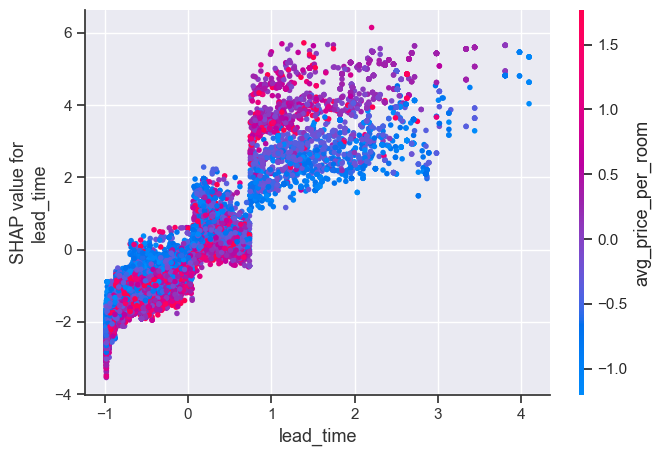

In [39]:
shap.dependence_plot("lead_time", lgbm_shap_values[1], X_train_enc)

As `lead_value` increases, SHAP values for class 1 increase as well, suggesting that class is likely to be 1 (cancellation) with higher values for lead_time.    

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


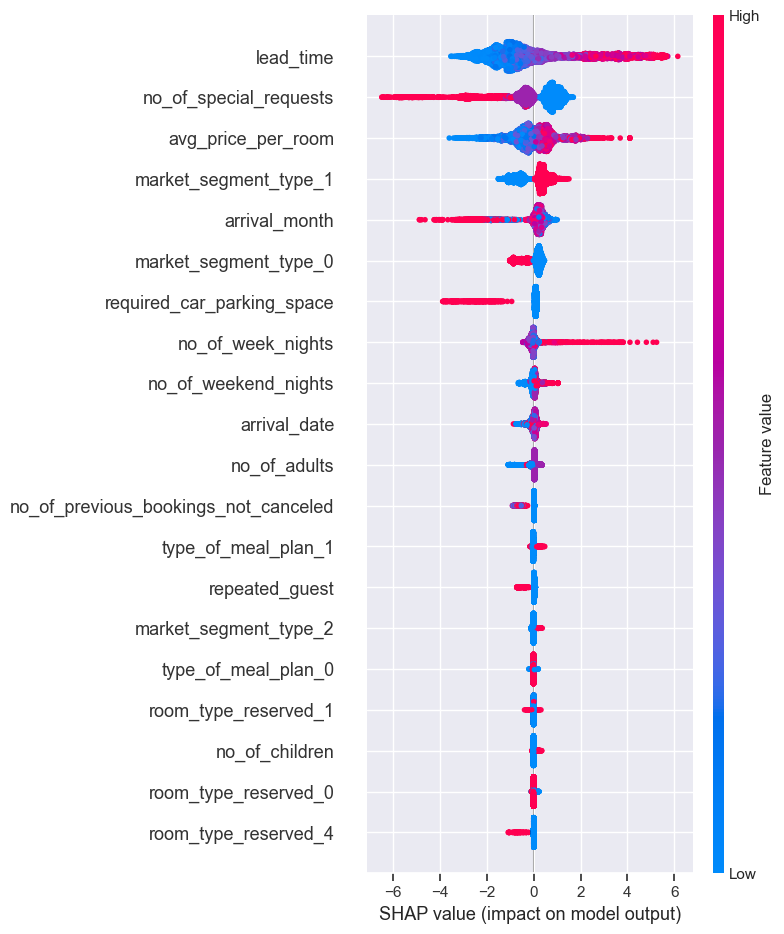

In [40]:
shap.summary_plot(lgbm_shap_values[1], X_train_enc)

In [41]:
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)

test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [42]:
lgbm_tuned.predict_proba(X_test_enc)[1]

array([0.828858, 0.171142])

In [43]:
lgbm_tuned.predict(X_test_enc, raw_score=True)[1]

-1.5775552228796799

In [44]:
lgbm_explainer.expected_value

[0.9004260963600503, -0.9004260963600503]

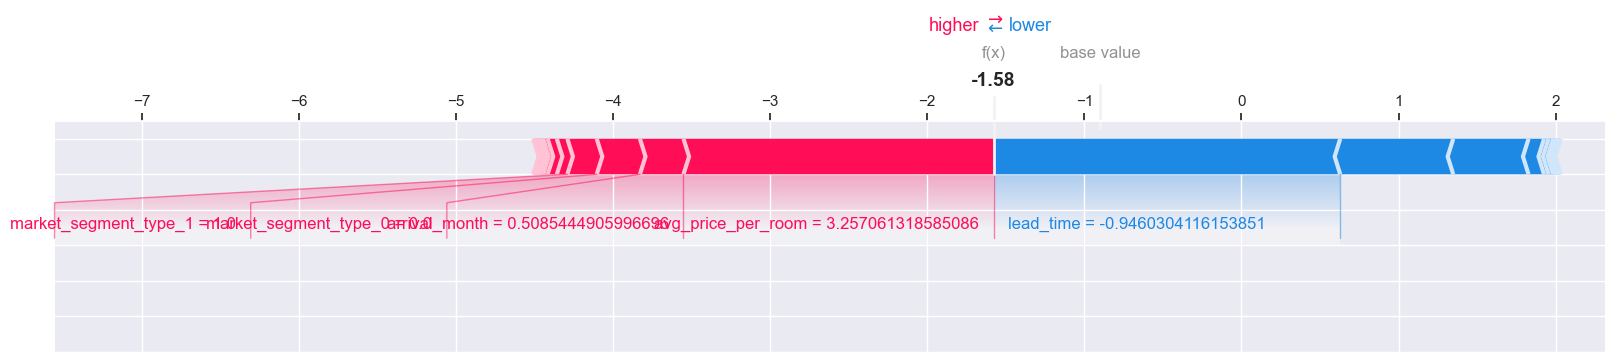

In [45]:
shap.force_plot(
    lgbm_explainer.expected_value[1],
    test_lgbm_shap_values[1][1, :],
    X_test_enc.iloc[1, :],
    matplotlib=True,
)

**Summary of observations**
- From the analysis above we observe that avg_price_per_room and lead_time features seem to be one of the most important features. 
- The SHAP dependence plot demonstrates that the class is likely to be 1 (cancellation) for higher values for price per room, which makes some sense sense. Small values of lead time drive the prediction lower (there is less time to cancel).

### END SOLUTION

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

### BEGIN SOLUTION

In [46]:
from sklearn.metrics import f1_score

best_model = random_search_lgbm.best_estimator_
print(
    "Grid Search best model validation score: %0.3f" % (random_search_lgbm.best_score_)
)

predictions = best_model.predict(X_test)
print(
    "Macro-average f1 score on the test set: %0.3f"
    % (f1_score(y_test, predictions, average="macro"))
)

Grid Search best model validation score: 0.851
Macro-average f1 score on the test set: 0.859


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


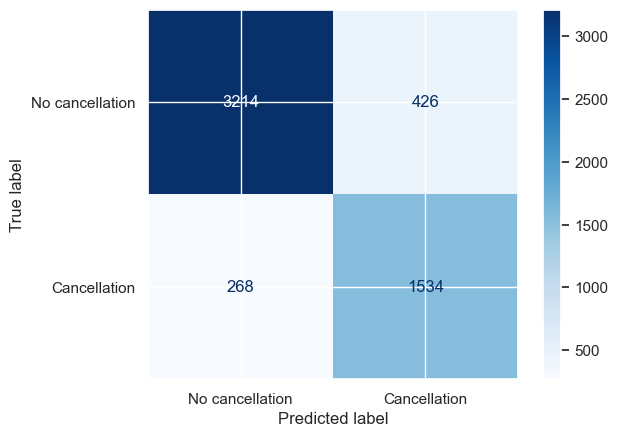

In [47]:
from sklearn.metrics import classification_report

plot_confusion_matrix(
    best_model,
    X_test,
    y_test,
    display_labels=["No cancellation", "Cancellation"],
    values_format="d",
    cmap=plt.cm.Blues,
)

In [48]:
print(
    classification_report(
        y_test, predictions, target_names=["No cancellation", "Cancellation"]
    )
)

                 precision    recall  f1-score   support

No cancellation       0.92      0.88      0.90      3640
   Cancellation       0.78      0.85      0.82      1802

       accuracy                           0.87      5442
      macro avg       0.85      0.87      0.86      5442
   weighted avg       0.88      0.87      0.87      5442



The macro-average f1-score (0.86) on the held-out test set is pretty much in line with the macro-average f1-score validation score (0.85). So there doesn't seem to be severe optimization bias here.

### END SOLUTION

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

### BEGIN SOLUTION

Let's explain a default and a non-default test prediction using SHAP force plot. 
Let's first get indices for default and non-default examples. 

In [50]:
y_test_reset = y_test.reset_index(drop=True)
non_cancel_ind = y_test_reset[y_test_reset == 0].index.tolist()
cancel_ind = y_test_reset[y_test_reset == 1].index.tolist()

ex_non_cancel_index = non_cancel_ind[0]
ex_cancel_index = cancel_ind[0]

**Explanation of a non-default prediction**

In [51]:
lgbm_tuned.predict_proba(X_test_enc)[ex_non_cancel_index]

array([0.99868024, 0.00131976])

In [52]:
lgbm_tuned.predict(X_test_enc, raw_score=True)[ex_non_cancel_index]

-6.628982307380032

In [53]:
lgbm_explainer.expected_value

[0.9004260963600503, -0.9004260963600503]

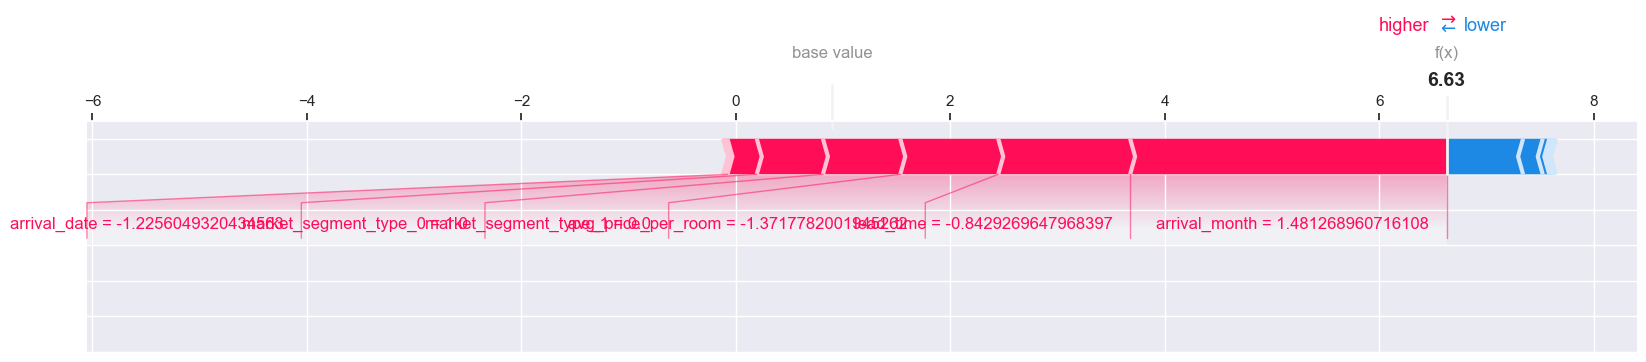

In [54]:
shap.force_plot(
    lgbm_explainer.expected_value[0],
    test_lgbm_shap_values[0][ex_non_cancel_index, :],
    X_test_enc.iloc[ex_non_cancel_index, :],
    matplotlib=True,
)

- The raw model score is 6.51, which is much greater than the base value 0.9004 and so the prediction is that the customer is not likely to cancel their reservation (because we are consider the shap values for class 0). 

**Explanation of a default prediction**

In [55]:
lgbm_tuned.predict_proba(X_test_enc)[ex_cancel_index]

array([0.10543516, 0.89456484])

In [56]:
lgbm_tuned.predict(X_test_enc, raw_score=True)[ex_cancel_index]

2.1382411773684935

In [57]:
lgbm_explainer.expected_value

[0.9004260963600503, -0.9004260963600503]

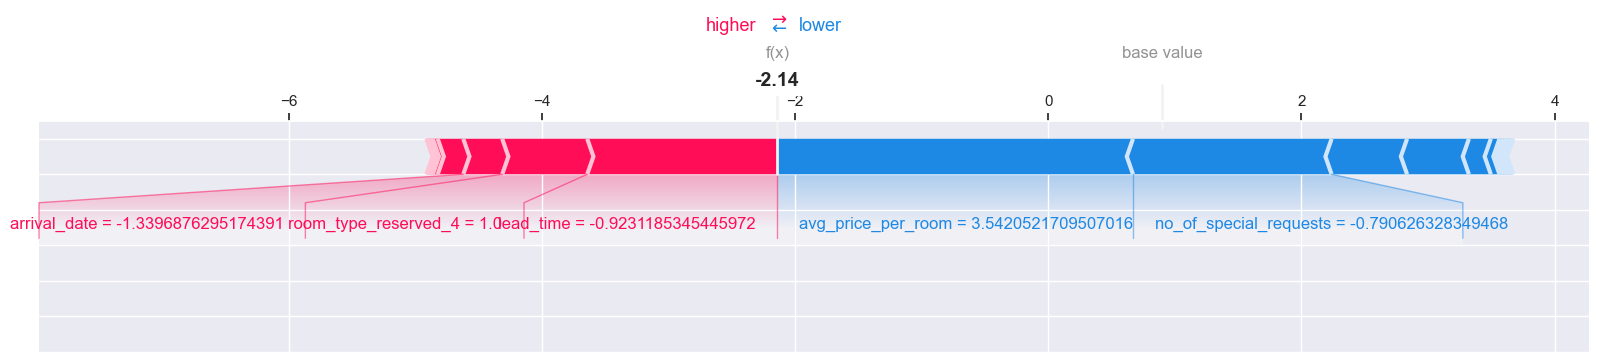

In [58]:
shap.force_plot(
    lgbm_explainer.expected_value[0],
    test_lgbm_shap_values[0][ex_cancel_index, :],
    X_test_enc.iloc[ex_cancel_index, :],
    matplotlib=True,
)

- The raw model score is -2.13, which is smaller than the base value 0.9004 and so the prediction is that the customer is likely to cancel their reservation (class 1). 
- The high value for avg_price_per_room variables seems to push the prediction towards a lower value, as well as the small number of special requests. 

### END SOLUTION

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

### BEGIN SOLUTION

In [59]:
pd.DataFrame(results).T
summary_df = pd.DataFrame(results).T
summary_df

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.001),0.001 (+/- 0.001),0.493 (+/- 0.011),0.501 (+/- 0.005)
logreg,0.122 (+/- 0.007),0.004 (+/- 0.001),0.761 (+/- 0.007),0.763 (+/- 0.002)
logreg (tuned),0.046 (+/- 0.037),0.004 (+/- 0.001),0.765 (+/- 0.010),0.765 (+/- 0.002)
RBF SVM,2.211 (+/- 0.043),0.869 (+/- 0.026),0.801 (+/- 0.009),0.817 (+/- 0.004)
random forest,0.689 (+/- 0.017),0.039 (+/- 0.001),0.860 (+/- 0.003),0.996 (+/- 0.000)
xgboost,0.480 (+/- 0.072),0.009 (+/- 0.004),0.857 (+/- 0.008),0.941 (+/- 0.005)
lgbm,0.189 (+/- 0.055),0.010 (+/- 0.001),0.852 (+/- 0.006),0.897 (+/- 0.002)
random forest (tuned),0.634 (+/- 0.018),0.036 (+/- 0.000),0.866 (+/- 0.005),0.974 (+/- 0.003)
lgbm (tuned),0.128 (+/- 0.028),0.010 (+/- 0.001),0.851 (+/- 0.007),0.897 (+/- 0.002)


In [60]:
comments = {
    "dummy": "Baseline of 0.50 macro-average f1 score.",
    "logreg": "Improvement over the baseline but underfitting.",
    "logreg (tuned)": "Slight improvement but still underfitting.",
    "RBF SVM": "Improvement over tuned logistic regression but slow.",
    "random forest": "Improvement over tuned logistic regression but overfitting.",
    "xgboost": "Not as good as random forest and also overfitting.",
    "lgbm": "Similar performance, faster and less overfitting.",
    #"random forest+ feat_sel": "Feature selection with L1 regularization helps a tiny bit. Selects 29 features.",
    #"xgboost+ feat_sel": "Very tiny improvement with L1 feature selection.",
    #"lgbm+ feat_sel": "No improvemnt with L1 feature selection.",
    "random forest (tuned)": "Hyperparameter optimization helped! Best results so far.",
    "lgbm (tuned)": "Hyperparameter optimization did not help in this case. Picking this as the best model for its speed and similar performance.",
}
pd.set_option("display.max_colwidth", 0)
summary_df["comments"] = comments.values()
summary_df

,fit_time,score_time,test_score,train_score,comments
dummy,0.001 (+/- 0.001),0.001 (+/- 0.001),0.493 (+/- 0.011),0.501 (+/- 0.005),Baseline of 0.50 macro-average f1 score.
logreg,0.122 (+/- 0.007),0.004 (+/- 0.001),0.761 (+/- 0.007),0.763 (+/- 0.002),Improvement over the baseline but underfitting.
logreg (tuned),0.046 (+/- 0.037),0.004 (+/- 0.001),0.765 (+/- 0.010),0.765 (+/- 0.002),Slight improvement but still underfitting.
RBF SVM,2.211 (+/- 0.043),0.869 (+/- 0.026),0.801 (+/- 0.009),0.817 (+/- 0.004),Improvement over tuned logistic regression but slow.
random forest,0.689 (+/- 0.017),0.039 (+/- 0.001),0.860 (+/- 0.003),0.996 (+/- 0.000),Improvement over tuned logistic regression but overfitting.
xgboost,0.480 (+/- 0.072),0.009 (+/- 0.004),0.857 (+/- 0.008),0.941 (+/- 0.005),Not as good as random forest and also overfitting.
lgbm,0.189 (+/- 0.055),0.010 (+/- 0.001),0.852 (+/- 0.006),0.897 (+/- 0.002),"Similar performance, faster and less overfitting."
random forest (tuned),0.634 (+/- 0.018),0.036 (+/- 0.000),0.866 (+/- 0.005),0.974 (+/- 0.003),Hyperparameter optimization helped! Best results so far.
lgbm (tuned),0.128 (+/- 0.028),0.010 (+/- 0.001),0.851 (+/- 0.007),0.897 (+/- 0.002),Hyperparameter optimization did not help in this case. Picking this as the best model for its speed and similar performance.


#### Concluding remarks

All our models beat the baseline. Our highest scoring model was random forest classifier with tuned hyperparameters, with a cross-validation macro-average f1 score of 0.866. however, it is quite slow to train and shows some signs of overfitting. LightGBM model is faster and with a similar performance. IT also seems to overfit less, so it was picked as our final model.  

We observed the macro-average f1 score of 0.859 using this model on the held out test set, which is in line with mean cross-validation macro-average f1-score (0.851). So there doesn't seem to be severe optimization bias here.

Our analysis of feature importances shows that our `lead_time` and `avg_price_epr_room` variables seems to be most important features.  


### END SOLUTION

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 